# COGS 108 - Final Project 

# Overview

In this project, I examined the relationship between San Diego's budget data and it's crime data for the years of 2017 through 2019. The goal was to find a correlation between budget and crime and to see if they influenced each other. The results of my analysis are that there is no clear correlation between these variables since between 2017 and 2018, there was a crime decrease and 2018 to 2019 saw an increase all while budget steadily increased over the years. In conclusion, there is more research to be done between crime and police budget data and also crime and other forms of budget data. 

# Name & GitHub

- Name: Brianna Quick
- GitHub Username: briannaquick

# Research Question

Does budget data and crime data have a positive or negative correlation for the city of San Diego from 2017 to 2019?

## Background and Prior Work

In these tumulutous times, there has been one seemingly big question that society has been pondering on. Will reducing police budget help in solving the systemic racism taking place and reduce the numbers of injustice appearing throughout the U.S., especially the disproportional murder of black folks by police brutality? Or will in fact, the opposite happens, less police spending can cause an increase in police brutality? Both sides seem to have an argument backed up by data.


Earlier this year, we observed an increase in crime in many cities across the U.S.. Some, including to President Trump,  believe it is due to the recent calls to defund the police, but this article posted by the Washington Post, says otherwise. "The spike is related in complex ways to both the coronavirus pandemic and social unrest over police violence ... the looming reductions in policing and other city services are much more likely to result from revenue shortfalls caused by the coronavirus than from the demands of protesters." (Rosenfeld, Washington Post, 2020) This article blames social unrest and panic due to the Pandemic for the increase in crime in many cities, dismantling the belief that it as due to decreases in police spending. 

However, other sources seem to see an opposite trend than what people are calling for. In Minneosota, the Minneapolis City Council voted to defund the police department and redistribute it's funds to a community-based system of policing. With the current data, this seems to have backfired. "The Minneapolis Police Department’s crime data reflects a rise in assaults, robberies, and homicides, as well as property crimes and arson." And going as far to say that, "more people have been murdered in the first nine months of 2020 than in all of 2019." (Royal Alexander, Shreveport Times, 2020) We could never know if this increase in crime in Minneapolis was due to a decrease in spending or just civil unrest due to these trying times, but more data seems to be needed to understand the correlation. 

Finally, this source gives hard data on this trend Nationwide. This article from Politico seems to support a compromise between the two sides. Thomas and Jin write, "Studies have shown that an increase in sworn police officers reduces instances of crime. "However, increases in other factors — such as social welfare, access to health care, employment and other social services — have also been shown to decrease crime rates." (Thomas & Jin, Politco, 2020) It is unclear whether the decrease in crime rates is due to an increase in police budget or an increase in societal spending towards school, health services, and other welfare programs but it is safe to say that it is a healthy combination of both. 

Because of this confusion between sides and clear causations, it is critical for data on these issues. Data scientists can significantly help in defining trends that seem unclear without the mountains of data to analyze. My research will specifically focus on the city of San Diego and it's budget and crime rates. If we could find a clear trend between these variables, we can then come up with a clear answer to this daunting question and hopefully create a better future with less injustice. 

References (include links):
- 1) As U.S. crime rates dropped, local police spending soared: https://www.politico.com/interactives/2020/police-budget-spending-george-floyd-defund/
- 2) City that defunded police shocked by crime increase: https://www.shreveporttimes.com/story/opinion/columnists/2020/09/25/royal-alexander-city-defunded-police-sees-increase-crime/3522771001/
- 3) Crime is up. But it’s not because people are criticizing the police: 
https://www.washingtonpost.com/outlook/2020/09/14/crime-increase-pandemic-protests/


# Hypothesis


I predict that an increase in police spending will also correlate with a decrease in crime rates in San Diego during 2017 - 2020. This is because prior work on these issues resulted in this trend and I believe an increase in police budget will cause an increase in funding for not only policing services but also social services, including health care, schooling, and societal reforms. 

# Dataset(s)


- Dataset Name: San Diego Budget Data
- Link to the dataset: https://data.sandiego.gov/datasets/operating-actuals/
- Number of observations: 454,891
- Description: This dataset shows the the amount of dollars spent throughout the city to fund operations and services. 



- Dataset Name: San Diego Crime Data
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 1,742,003 (for all three years)
- Description: This data provides calls dispatched by the San Diego Police Department's communications dispatch center. Data regarding sensitice incidents is not included.



# Setup

In [1]:
#imports

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


# Reading Files

- Budget Data 
- Police Calls Data (2017 - 2020)
- Police Dictionary

In [2]:
#read in budget data
df_budget = pd.read_csv('actuals_operating_datasd.csv')

In [3]:
#check it out
df_budget.head()

,amount,report_fy,fund_type,fund_number,dept_name,funds_center_number,account,account_number
0,349193.50,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Salaried Wages,500011
1,23875.99,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation,500014
2,7449.95,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Sick Leave/Vacation Accrual,500015
3,2942.31,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,A/L Bereavement Pay,500016
4,1532.45,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation Pay In Lieu,500017


In [4]:
#read in police call data for 2020
df_calls20 = pd.read_csv('pd_calls_for_service_2020_datasd.csv')

In [5]:
#check it out
df_calls20.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1


In [6]:
#read in police call data for 2019
df_calls19 = pd.read_csv('pd_calls_for_service_2019_datasd.csv')

In [7]:
#check it out
df_calls19.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019-01-01 00:00:01,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019-01-01 00:00:04,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019-01-01 00:00:09,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019-01-01 00:00:19,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019-01-01 00:00:31,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4


In [8]:
#read in police call data for 2018
df_calls18 = pd.read_csv('pd_calls_for_service_2018_datasd.csv')

In [9]:
#check it out
df_calls18.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E18010000001,2018-01-01 00:00:09,0,0,NaN,MONROE,AVE,NaN,PARK,NaN,FD,K,624,2
1,E18010000002,2018-01-01 00:00:41,0,0,NaN,MAIN,ST,NaN,THOR,NaN,AU1,W,511,1
2,E18010000003,2018-01-01 00:00:52,0,4300,NaN,OCEAN,BLV,NaN,NaN,NaN,1016,A,122,2
3,E18010000004,2018-01-01 00:00:55,0,4500,NaN,BOYLSTON,ST,NaN,NaN,NaN,AU1,W,445,1
4,E18010000005,2018-01-01 00:00:56,0,0,NaN,04TH,AVE,NaN,ISLAND,NaN,1151,O,523,3


In [10]:
#read in police call data for 2017
df_calls17 = pd.read_csv('pd_calls_for_service_2017_datasd_v1.csv')

In [11]:
#check it out
df_calls17.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,P17010000001,2017-01-01 00:00:09,6,0,NaN,CHP INFO LOG,NaN,NaN,NaN,NaN,INFOCHP,K,999.0,4
1,P17010000002,2017-01-01 00:00:10,6,0,NaN,SHOPS INFO LOG,NaN,NaN,NaN,NaN,SHOPS,K,999.0,4
2,P17010000004,2017-01-01 00:00:25,6,1500,NaN,CARAMAY,PL,NaN,NaN,NaN,AU1,CAN,723.0,1
3,P17010000005,2017-01-01 00:00:34,6,2800,NaN,GARNET,AV,NaN,NaN,NaN,T,O,122.0,1
4,P17010000006,2017-01-01 00:01:23,6,300,NaN,47TH,ST,NaN,NaN,NaN,245,R,446.0,1


In [12]:
#read in police call dictionary
df_dict = pd.read_csv('pd_calls_for_service_dictionary_datasd.csv')

In [13]:
#check it out
df_dict.head()

,field,description,possible_values
0,incident_num,Unique Incident Identifier,NaN
1,date_time,Date / Time in 24 Hour Format,NaN
2,day,Day of the week,"(1 = Sunday, 2 = Monday ...)"
3,address_number_primary,"Street Number of Incident, Abstracted to block...",NaN
4,address_dir_primary,Direction of street in address,ex: 123 W El Cajon Bl


# Data Cleaning

- # **Budget Data**


In [14]:
#renaming columns

df_budget.columns = ['amount', 'year', 'fund_type', 'fund_number', 'dept_name', 'fund_center_number', 'account', 'account_number']

In [15]:
#checking unique values in year
df_budget['year'].unique()

array([17, 14, 13, 12, 16, 15, 11, 18, 19])

In [16]:
#checking unique values in department names
df_budget['dept_name'].unique()

array(['Office of the Chief Operating Officer', 'Council District 1',
       'Council District 2', 'Council District 3', 'Council District 4',
       'Council District 5', 'Council District 6', 'Council District 7',
       'Council District 8', 'Council District 9',
       'Council Administration', 'City Clerk',
       'Independent Budget Analyst', 'City Attorney', 'Personnel',
       'Ethics Commission', 'Office of the City Auditor',
       'Assistant Chief Operating Officer', 'Performance & Analytics',
       'Human Resources', 'Department of Information Technology',
       'Economic Development', 'Internal Operations',
       'Office of the Mayor', 'Communications', 'Chief Financial Officer',
       'City Comptroller', 'Debt Management', 'Financial Management',
       'Purchasing & Contracting', 'City Treasurer',
       'Smart & Sustainable Communities', 'Development Services',
       'Real Estate Assets', 'Planning', 'Library', 'Parks & Recreation',
       'Fire-Rescue', 'Police', 

In [17]:
#dropping rows with no values
df_budget = df_budget.dropna(how = 'all')

In [18]:
df_budget

,amount,year,fund_type,fund_number,dept_name,fund_center_number,account,account_number
0,349193.50,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Salaried Wages,500011
1,23875.99,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation,500014
2,7449.95,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Sick Leave/Vacation Accrual,500015
3,2942.31,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,A/L Bereavement Pay,500016
4,1532.45,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation Pay In Lieu,500017
...,...,...,...,...,...,...,...,...
454886,145.00,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Equipment Rental - Motive Pool,512145
454887,300.00,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Promotion/Recognition - City Employees,512175
454888,517.44,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Wireless Stipend,512245
454889,8109.59,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Hardware/Software - Discretionary,513104


In [19]:
df_budget.shape

(454891, 8)

In [20]:
#narrowing budget data to only police departments
df_police = df_budget[df_budget['dept_name'].str.contains("Police")]

In [21]:
df_police.head()

,amount,year,fund_type,fund_number,dept_name,fund_center_number,account,account_number
18684,133519.39,17,General Fund,100000,Police,1914000001,Emergency Cost Rec Prog,416019
18685,184548.00,17,General Fund,100000,Police,1914000001,Revenue from Other Agencies,420001
18686,3.41,17,General Fund,100000,Police,1914000001,Fingerprinting Fees,422046
18687,26047.81,17,General Fund,100000,Police,1914000001,Service Charges Other,422082
18688,672761.29,17,General Fund,100000,Police,1914000001,Services to Other Agencies,422303


In [22]:
df_police.shape

(37404, 8)

In [23]:
#let's only include data from 2017 through 2020 since we only read in those from the other dataset 
df_police = df_police[df_police['year'] >= 17]

In [24]:
#checking for years of police data
df_police['year'].unique()

array([17, 18, 19])

In [25]:
df_police.shape

(14533, 8)

- # **Service Calls**

In [26]:
#let's change the date_time column to only include the year for our analysis
df_calls19['date_time'] = '2019'

In [27]:
df_calls19.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4


In [28]:
df_calls18['date_time'] = '2018'

In [29]:
df_calls17['date_time'] = '2017'

In [30]:
#let's combine all the Police service calls for the years 2017 - 2020
df_calls = pd.concat([df_calls17, df_calls18])

In [31]:
df_calls = pd.concat([df_calls, df_calls19])

In [32]:
df_calls.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,P17010000001,2017,6,0,NaN,CHP INFO LOG,NaN,NaN,NaN,NaN,INFOCHP,K,999.0,4
1,P17010000002,2017,6,0,NaN,SHOPS INFO LOG,NaN,NaN,NaN,NaN,SHOPS,K,999.0,4
2,P17010000004,2017,6,1500,NaN,CARAMAY,PL,NaN,NaN,NaN,AU1,CAN,723.0,1
3,P17010000005,2017,6,2800,NaN,GARNET,AV,NaN,NaN,NaN,T,O,122.0,1
4,P17010000006,2017,6,300,NaN,47TH,ST,NaN,NaN,NaN,245,R,446.0,1


In [33]:
#let's see how gigantic this dataframe is because I'm curious
df_calls.shape

(1742003, 14)

In [34]:
#double checking it's in the right order (chronologically)
df_calls['date_time'].iloc[0]

'2017'

In [35]:
df_calls['date_time'].iloc[-1]

'2019'

In [36]:
#now let's clean - drop unnecessary columns

df_calls = df_calls.drop(columns = ['incident_num', 'address_number_primary', 'address_dir_primary', 'address_dir_intersecting',
                                    'address_road_intersecting', 'address_sfx_intersecting'])

In [37]:
#rename columns of dataframe

df_calls.columns = ['year', 'day', 'street_name', 'abbre', 'call_type', 
                               'disposition', 'beat', 'priority']

In [38]:
df_calls.head()

,year,day,street_name,abbre,call_type,disposition,beat,priority
0,2017,6,CHP INFO LOG,NaN,INFOCHP,K,999.0,4
1,2017,6,SHOPS INFO LOG,NaN,SHOPS,K,999.0,4
2,2017,6,CARAMAY,PL,AU1,CAN,723.0,1
3,2017,6,GARNET,AV,T,O,122.0,1
4,2017,6,47TH,ST,245,R,446.0,1


In [39]:
#total calls for all three years
df_calls.count()

year           1742003
day            1742003
street_name    1741362
abbre          1587039
call_type      1736662
disposition    1736143
beat           1741439
priority       1742003
dtype: int64

In [40]:
df_calls

,year,day,street_name,abbre,call_type,disposition,beat,priority
0,2017,6,CHP INFO LOG,NaN,INFOCHP,K,999.0,4
1,2017,6,SHOPS INFO LOG,NaN,SHOPS,K,999.0,4
2,2017,6,CARAMAY,PL,AU1,CAN,723.0,1
3,2017,6,GARNET,AV,T,O,122.0,1
4,2017,6,47TH,ST,245,R,446.0,1
...,...,...,...,...,...,...,...,...
590962,2019,3,OCEAN,BLV,FOOT,CAN,122,3
590963,2019,3,RUFFIN,RD,415N,K,311,3
590964,2019,3,04TH,AVE,1016,A,-1,2
590965,2019,3,04TH,AVE,1016,A,523,2


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [41]:
#let's chart the number of police calls for every year 

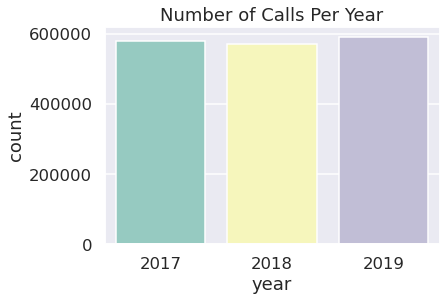

In [42]:
calls = sns.countplot(x = 'year', data = df_calls, palette = "Set3")

calls.set_title('Number of Calls Per Year')

f1 = plt.gcf()

In [43]:
#let's try to count the actual number of calls per year so we can better see the distribution 

df_calls[df_calls['year'] == '2017'].shape

(580577, 8)

In [44]:
df_calls[df_calls['year'] == '2018'].shape

(570459, 8)

In [45]:
df_calls[df_calls['year'] == '2019'].shape

(590967, 8)

In [46]:
#approximately 10,000 call decrease from 2017 to 2018 but a 20,000 call increase from 2018 to 2019

Text(0.5, 1.0, 'Police Budget Over Years')

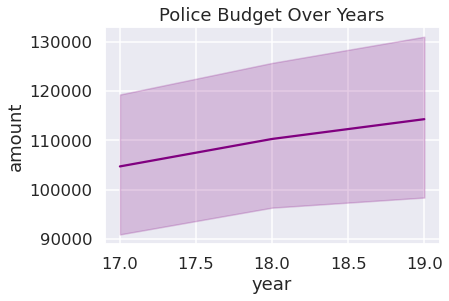

In [47]:
#how police budget has changed over time

budget = sns.lineplot(x = "year", y = "amount",
             data = df_police, color = 'purple', estimator = 'mean')

budget.set_title('Police Budget Over Years')
 

In [48]:
df_police['account'].unique

<bound method Series.unique of 18684                      Emergency Cost Rec Prog
18685                  Revenue from Other Agencies
18686                          Fingerprinting Fees
18687                        Service Charges Other
18688                   Services to Other Agencies
                            ...                   
432998    Miscellaneous Professional/Technical Ser
432999                        Misc. Fees & Charges
433000              Computer Maintenance/Contracts
433001           Hardware/Software - Discretionary
433002                           Cap Exp-Equipment
Name: account, Length: 14533, dtype: object>

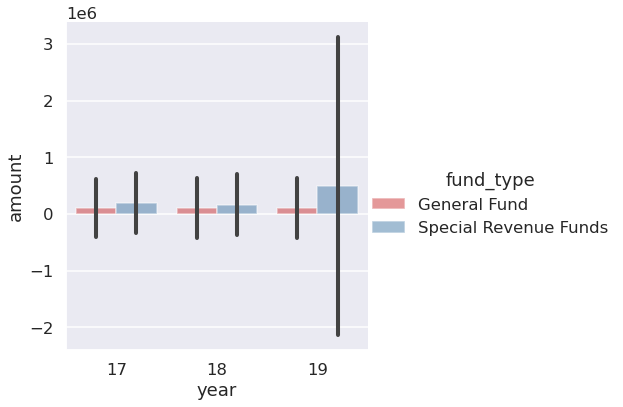

In [49]:
#let's compare the amount of money per year also considering where it came from 
sns.catplot(
    data = df_police, kind = "bar",
    x = "year", y = "amount", hue = "fund_type",
    ci = "sd", palette = "Set1", alpha = .5, height = 6)

In [50]:
#general funds seem to stay steady over the years, while special revenue funds seem to have dramatically increased in 2019

df_budget[(df_budget['year'] == '2019') & (df_budget['fund_type'] == 'Special Revenue Funds')]['account'].unique()

array([], dtype=object)

# Ethics & Privacy

There are always ethical concerns when dealing with real data. Initially in the police call data, address numbers of where incidents occurred were included as well as street names and abbreviations. To ensure privacy of addresses, I dropped the address numbers column as it could be invasion of privacy, but did leave in address street names and abbreviations for context. In the budget dataset for the City of San Diego there is no concern for individual privacy and all the information is publicly available. However, there are always unethical ways to utilize data; in misconstruing information or trying to falsify facts to fit the experimenters needs. As ethics are always a concern, so is potential bias. Both datasets were found on the City of San Diego's database website and I am assuming that all information they consist of is correct and true, done by professional data scientists. 

# Conclusion & Discussion

## **Limitations**


When downloading data, I decided to include the years 2017 until 2019 since that is when the two datasets overlap in time. Even though 2020 data for Police Service Calls was available, the data is unfinished and there was no 2020 data for the San Diego budget, so it was left out to avoid confounds and confusion. Also, I could have downloaded more service call data for years 2016 and 2015 since those also overlap with budget data, but I was trying to save download space on my computer. 

Potential confounds are also a concern for data. The "crime" data is the amount of service calls for the year to the San Diego Police Department. There is also a disclaimer before the data on the website mentioning the exclusion of all sensitive crimes, including but not limited too domestic violence, suicides, and stalkings. Because of this exclusion, this is not a complete list of crime due to ethical and privacy concerns. Also, this data does not necessarily include all crime for the city as some calls may have not been made or calls including no crime were made. This is simply a general estimate of the crimes committed for this specific year in San Diego. 

Furthermore, the "Police Budget" data used was found using the word "Police" in the account category which means similar accounts such as "Fire-Rescue" or other public services were not included in this data to determine the relationship between the number of police calls made with the police budget. This is a general estimate of the Police budget for the specific year in San Diego. 

## **Results**

Finally, there is approximately a 10,000 call decrease from 2017 to 2018 but a 20,000 call increase from 2018 to 2019 for the police call service dataset, while the police budget data seems to increase steadily over the years. There was a huge increase in Special Revenue Funds observed in 2019 as opposed to other years, yet a drastic increase in service calls (est. 20,000). This seems to suggest no clear correlation between number of calls for service in a year and the police budget since one year it decreases and the other increases as budget steadily increases, but more research is to be done. What may be interesting to examine is the budget for public services as opposed to police budget so we may observe a trend in the budget for the public and the number of service calls made in a given year.  